# Battle of Neighborhoods Code

#### Let's first download all the dependencies that we need in order to accomplish this project

In [40]:
! pip install folium==0.5.0
!pip install geocoder
!pip install geopy

In [41]:
import pandas as pd
import numpy as np
import json
import matplotlib as mpl
import requests
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import folium
from bs4 import BeautifulSoup
import geocoder
from geopy.geocoders import Nominatim

#### Now Let's assemble the data first and make a cleaned dataframe for the project

In [2]:
webtext = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
bs = BeautifulSoup(webtext,'xml')
table = bs.find('div', class_='mw-parser-output')
table_rows = table.find_all('tr')
#Let's clean it now
cleaned_data=[]
for rows in table_rows:
    temp=[]
    for i in rows.find_all('td'):
        temp.append(i.text.strip())
    cleaned_data.append(temp)
df1=pd.DataFrame(data=cleaned_data)
df2=df1[[0,1,2]]
df2.rename( columns={0:'PostalCode', 1:'Borough', 2:'Neighborhood'}, inplace=True )
df2=df2[~df2['Borough'].isnull()]
df2=df2[df2.Borough!='Not assigned']
df2=df2[:-4]
df2=df2.reset_index(drop=True, inplace= False)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [3]:

import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9bc7891248c24f4681195e5fd8304ff3 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='hjcfypfLhxv4qrM2JJW2O3pbaVUHv4o8leAEIaQJEscO',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_9bc7891248c24f4681195e5fd8304ff3.get_object(Bucket='applieddatasciencecapstoneproject-donotdelete-pr-5smw9igoycyfvy',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [4]:
mergedDF=pd.merge(left=df2, right=df_data_1, left_on='PostalCode', right_on='Postal Code')
del mergedDF['Postal Code']
mergedDF.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [5]:
#making a backup dataframe of cleaned data
toronto_data_backup=mergedDF

In [6]:
downtown_df=mergedDF.loc[mergedDF['Borough']=='Downtown Toronto']

In [7]:
downtown_df.shape

(19, 5)

In [8]:
downtown_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [9]:
address = 'Downtown Toronto, Canada'
geolocator = Nominatim(user_agent="Downtown Toronto")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto Canada are 43.6563221, -79.3809161.


#### Let's have a look at the map of downtown toronto

In [10]:
map_downtown = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, nei in zip(downtown_df['Latitude'], downtown_df['Longitude'], downtown_df['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_downtown)  
    
map_downtown

#### Next, we are going to start utilizing the Foursquare API to explore the neighborhoods

In [11]:
#Defining foursquare credentials
{"tags": ["hide-input",]}
CLIENT_ID = 'UX5OWKSUQN4MQ5PTAUDOLD4C2CV01J4AMAIWOHCUE14KROVM' # your Foursquare ID
CLIENT_SECRET = 'GXYHJ4SQAXVAKSZAFVOYC3IAZXRUMW3MY2CTS1VWKGV5Y52N' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UX5OWKSUQN4MQ5PTAUDOLD4C2CV01J4AMAIWOHCUE14KROVM
CLIENT_SECRET:GXYHJ4SQAXVAKSZAFVOYC3IAZXRUMW3MY2CTS1VWKGV5Y52N


#### Now as we know that FourSquare has limit, so we're gonna limit our venue upto 100.

In [12]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=UX5OWKSUQN4MQ5PTAUDOLD4C2CV01J4AMAIWOHCUE14KROVM&client_secret=GXYHJ4SQAXVAKSZAFVOYC3IAZXRUMW3MY2CTS1VWKGV5Y52N&v=20180605&ll=43.6563221,-79.3809161&radius=500&limit=100'

In [13]:
results = requests.get(url).json()
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [14]:
nearby_venues.head()

,name,categories,lat,lng
0,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641
1,Yonge-Dundas Square,Plaza,43.656054,-79.380495
2,Silver Snail Comics,Comic Shop,43.657031,-79.381403
3,CF Toronto Eaton Centre,Shopping Mall,43.654447,-79.380952
4,Ed Mirvish Theatre,Theater,43.655102,-79.379768


In [15]:
nearby_venues.shape

(100, 4)

#### Let's check the top 10 categories in Toronto Downtown

In [16]:
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Coffee Shop                  12
Clothing Store                6
Hotel                         3
Middle Eastern Restaurant     3
Ramen Restaurant              2
Cosmetics Shop                2
Bookstore                     2
Japanese Restaurant           2
Diner                         2
Plaza                         2
Name: categories, dtype: int64

#### Now Let's explore the nearby Venues of Toronto Downtown

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:
downtown_venues = getNearbyVenues(names=downtown_df['Neighborhood'], latitudes=downtown_df['Latitude'], longitudes=downtown_df['Longitude'])

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


In [19]:
print('There are {} Uniques Categories.'.format(len(downtown_venues['Venue Category'].unique())))
downtown_venues.groupby('Neighborhood').count().head()

There are 222 Uniques Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,100,100,100,100,100,100
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",26,26,26,26,26,26
Central Bay Street,100,100,100,100,100,100
Christie,25,25,25,25,25,25
Church and Wellesley,100,100,100,100,100,100


#### Now as we have seen that there are 222 unique categories, Let's dive into the exploration through one hot encoding

In [20]:
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]
downtown_grouped = downtown_onehot.groupby('Neighborhood').mean().reset_index()
downtown_onehot.head(5)

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,...,Tunnel,Udon Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
num_top_venues = 5
for hood in downtown_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =downtown_grouped[downtown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Berczy Park ----
         venue  freq
0  Coffee Shop  0.10
1        Hotel  0.06
2         Café  0.04
3     Beer Bar  0.04
4   Restaurant  0.04


---- CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport ----
                 venue  freq
0  Rental Car Location  0.12
1          Coffee Shop  0.08
2        Boat or Ferry  0.08
3       Airport Lounge  0.08
4      Airport Service  0.08


---- Central Bay Street ----
                 venue  freq
0          Coffee Shop  0.14
1                 Café  0.06
2          Art Gallery  0.04
3  Japanese Restaurant  0.03
4        Movie Theater  0.02


---- Christie ----
           venue  freq
0  Grocery Store  0.20
1           Café  0.16
2           Park  0.12
3    Coffee Shop  0.08
4            Gym  0.04


---- Church and Wellesley ----
                 venue  freq
0          Coffee Shop  0.10
1  Japanese Restaurant  0.05
2     Sushi Restaurant  0.04
3           Restaurant  0.03
4                

#### Now Let's try to get the most common venues around

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [49]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Hotel,Restaurant,Café,Beer Bar,Japanese Restaurant,Park,Bakery,Sporting Goods Shop,Creperie
1,"CN Tower, King and Spadina, Railway Lands, Har...",Rental Car Location,Coffee Shop,Harbor / Marina,Boat or Ferry,Sculpture Garden,Airport Lounge,Airport Service,Airport Terminal,Plane,Bar
2,Central Bay Street,Coffee Shop,Café,Art Gallery,Japanese Restaurant,Thai Restaurant,Gastropub,Hotel,Italian Restaurant,Middle Eastern Restaurant,Movie Theater
3,Christie,Grocery Store,Café,Park,Coffee Shop,Athletics & Sports,Italian Restaurant,Nightclub,Playground,Restaurant,Candy Store
4,Church and Wellesley,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Restaurant,Café,Gay Bar,Yoga Studio,Salad Place,Men's Store,Sandwich Place


#### Now Let's apply the K-Means Clustering Approach

In [50]:
downtown_grouped_clustering = downtown_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(downtown_grouped_clustering)
kmeans.labels_

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int32)

In [51]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_merged =downtown_df.iloc[:16,:]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

downtown_merged.head()# check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Park,Restaurant,Bakery,Theater,Café,Pub,Performing Arts Venue,Breakfast Spot,Thai Restaurant
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Park,Yoga Studio,Middle Eastern Restaurant,Beer Bar,Escape Room,Smoothie Shop
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Coffee Shop,Hotel,Japanese Restaurant,Gastropub,Sushi Restaurant,Spa,Gym,Falafel Restaurant,Electronics Store,Seafood Restaurant
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Café,Coffee Shop,Seafood Restaurant,Restaurant,American Restaurant,Beer Bar,Hotel,Bakery,Clothing Store,Gastropub
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Hotel,Restaurant,Café,Beer Bar,Japanese Restaurant,Park,Bakery,Sporting Goods Shop,Creperie


#### let's create a map of cluster now

In [53]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [55]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['Latitude'], downtown_merged['Longitude'], downtown_merged['Neighborhood'], downtown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### let's check the average price of houses in neighborhood

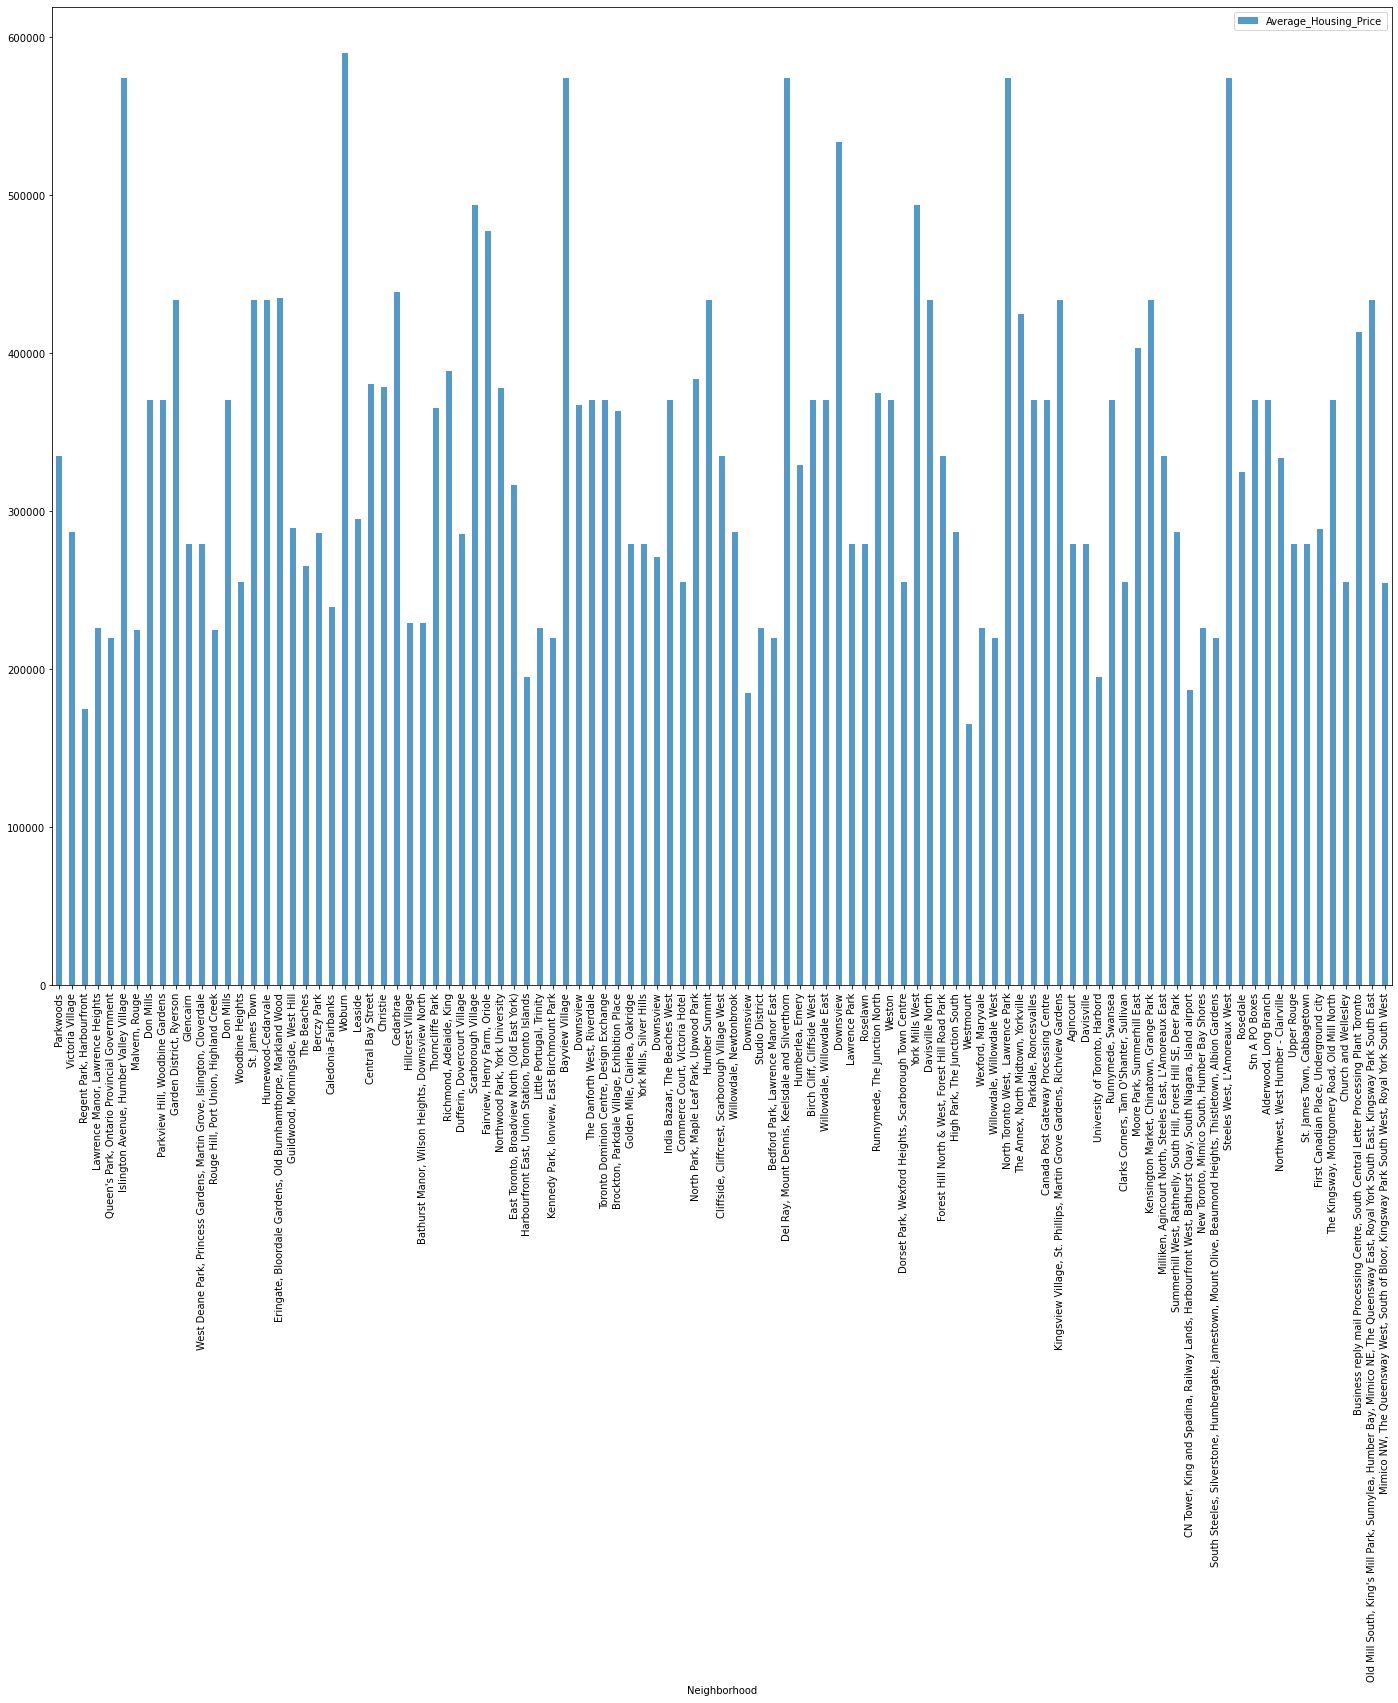

In [56]:
dfi=downtown_merged.loc[downtown_merged['Cluster Labels'] == 0,downtown_merged.columns[[2] + list(range(5, downtown_merged.shape[1]))]]
dfii=downtown_merged.loc[downtown_merged['Cluster Labels'] == 1,downtown_merged.columns[[2] + list(range(5, downtown_merged.shape[1]))]]
dfiii=downtown_merged.loc[downtown_merged['Cluster Labels'] == 2,downtown_merged.columns[[2] + list(range(5, downtown_merged.shape[1]))]]

downtown_Avg_HousingPrice=pd.DataFrame({"Neighborhood":df2["Neighborhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0,
                                                               435000.0,289500.0,265000.0,285900.0,239400.0,
                                                               589900.0,295000.0,380500.0,378500.0,438500.0,229200.0,
                                                               229200.0,365000.0,388500.,285400.0,493500.0,477500.0,378000.0,316600.0,195000.0,225900.0,219400.0,
                                                               573900.0,367000.0,370500.0,370500.0,363500.0,279200.0,
                                                               279200.0,271000.0,370500.,255400.0,383500.0,433500.0,335000.0,286600.0,185000.0,225900.0,219400.0,
                                                               573900.0,329000.0,370500.0,370500.0,533500.0,279200.0,
                                                               279200.0,375000.0,370500.,255400.0,493500.0,433500.0,335000.0,286600.0,165000.0,225900.0,219400.0,
                                                               573900.0,425000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,195000.0,370500.,255400.0,403500.0,433500.0,335000.0,286600.0,187000.0,225900.0,219400.0,
                                                               573900.0,325000.0,370500.0,370500.0,333500.0,279200.0,
                                                               279200.0,289000.0,370500.,255400.0,413500.0,433500.0,254800.0
                                                              
                                                              
                                                              ]})

downtown_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)
downtown_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)

In [63]:
downtown_Avg_HousingPrice["Average_Housing_Price"].describe()

count       103.000000
mean     335430.097087
std      100524.885062
min      165000.000000
25%      255400.000000
50%      333500.000000
75%      379500.000000
max      589900.000000
Name: Average_Housing_Price, dtype: float64

#### Let's check the top schools around

In [57]:
clusters=pd.DataFrame({"Cluster1":dfi["Neighborhood"],
                      "Cluster2":dfii["Neighborhood"],
                      "Cluster4":dfiii["Neighborhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

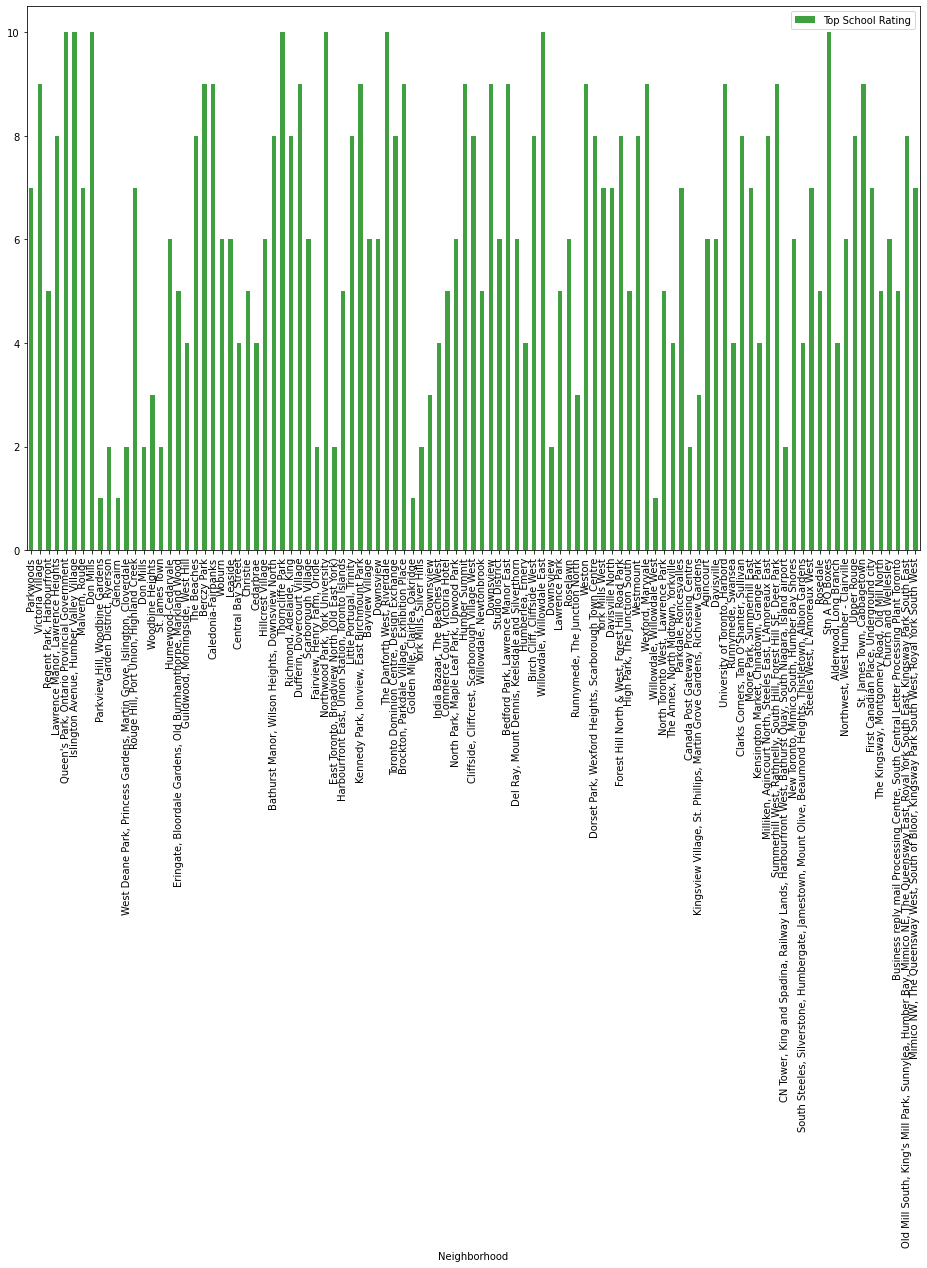

In [59]:
new_downtown=downtown_merged.set_index("Neighborhood",drop=True)
#Source:https://www.greatschools.org
downtown_school_ratings=pd.DataFrame({"Neighborhood":mergedDF["Neighborhood"],
                                      "Top School Rating":[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,
                                                           5,4,8,9,9,6,6,4,5,4,6,8,10,8,9,6,2,
                                                           10,2,5,8,9,6,6,10,8,9,1,2,3,4,5,6,9,
                                                           8,5,9,6,9,6,4,8,10,2,5,6,3,9,8,7,
                                                           7,8,5,8,9,1,5,4,7,2,3,6,6,9,4,8,7,
                                                           4,8,9,2,6,4,7,5,10,4,6,8,9,7,5,6,5,8,7
                                                           ]})

downtown_school_ratings.set_index('Neighborhood',inplace=True,drop=True)
downtown_school_ratings.plot(kind='bar',figsize=(16,10),color='green',alpha=0.75);

In [64]:
downtown_school_ratings["Top School Rating"].describe()

count    103.000000
mean       6.097087
std        2.564901
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Top School Rating, dtype: float64

## Conclusion

Using k-means clustering algorithm I've separated the neighborhood into 10(Ten) different clusters and for 103 different lattitude and logitude from dataset, which have very-similar neighborhoods around them. Using the charts above results presented to a particular neighborhood based on average house prices and school rating have been made.

### Link to Problem Statement and Data Description
https://github.com/Sherazch/Coursera_Capstone/blob/master/Battle%20of%20Neighborhoods.ipynb

### Link to Report
https://github.com/Sherazch/Coursera_Capstone/blob/master/Battle%20of%20Neighborhoods%20Report.ipynb